In [2]:
import numpy as np
import pandas as pd
import matplotlib
import cv2 as cv
import tensorflow as tf
from tensorflow import keras, cast
import matplotlib.pyplot as plt
import math

In [3]:
cnn = tf.keras.models.load_model('dining.h5')

In [4]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 1)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 32)      4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 56, 56, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 56, 64)        165952    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 80)       

1/1 [==============================] - 0s 12ms/step


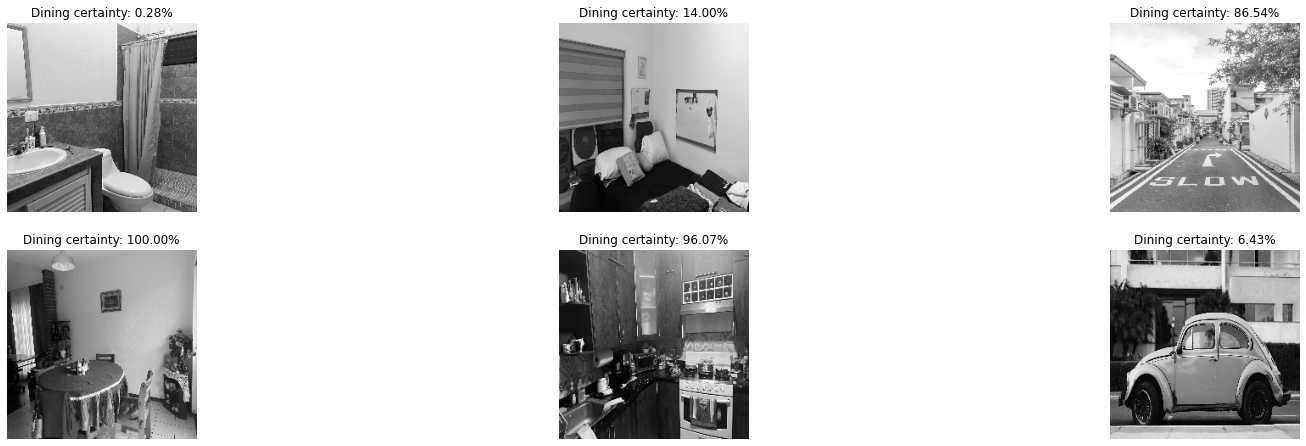

In [12]:
images_array = [
    # '../test_real_images/bathroom_google.jpg',
    '../test_real_images/bathroom.png',
    # '../test_real_images/bedroom_real.jpeg',
    '../test_real_images/bedroom_real_1.jpeg',
    # '../test_real_images/garden.jpg',
    '../test_real_images/street.jpg',
    '../test_real_images/dining.png',
    '../test_real_images/kitchen_1.png',
    # '../test_real_images/landscape.jpg',
    # '../test_real_images/office.jpg',
    '../test_real_images/car.jpg',
    # '../test_real_images/mall.png',
]

IMAGE_CHANNEL = 1

def prepare(filepath):
    IMG_SIZE = 224
    img_array = cv.imread(filepath, cv.IMREAD_GRAYSCALE)
    new_array = cv.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, IMAGE_CHANNEL)

images_array= [prepare(img) for img in images_array]
plt.figure(figsize=(28,16))
for i in range(len(images_array)):
  predicted = cnn.predict(images_array[i])
  ax = plt.subplot(4, 3, i+1)
  plt.imshow(images_array[i].reshape((224,224)).astype('uint8'), cmap='gray')
  plt.title(f"Dining certainty: {predicted[0][0]*100:.2f}%")
  plt.axis('off')

plt.show()

In [6]:
IMG_WIDTH=224
IMG_HEIGHT=224

def createDS(image_folder):
    batch_size = 32
    DEFAULT_SEED = 1234
    VALIDATION_SPLIT = 0.2
    train_ds = keras.utils.image_dataset_from_directory(
        image_folder,
        image_size=(IMG_HEIGHT, IMG_WIDTH),
        shuffle=True,
        labels='inferred',
        batch_size=batch_size,
        color_mode='grayscale',
        validation_split=VALIDATION_SPLIT,
        seed=DEFAULT_SEED,
        interpolation='gaussian',
        subset="training",
    )

    val_ds = keras.utils.image_dataset_from_directory(
        image_folder,
        image_size=(IMG_HEIGHT, IMG_WIDTH),
        shuffle=True,
        labels='inferred',
        batch_size=batch_size,
        color_mode='grayscale',
        validation_split=VALIDATION_SPLIT,
        seed=DEFAULT_SEED,
        interpolation='gaussian',
        subset="validation",
    )
    return train_ds, val_ds

train_ds, val_ds = createDS('../../../../../House_Room_Binary/dining/')

Found 2507 files belonging to 2 classes.
Using 2006 files for training.
Found 2507 files belonging to 2 classes.
Using 501 files for validation.


1/1 [==============================] - 0s 13ms/step
tf.Tensor(
[[129  28]
 [ 33  98]], shape=(2, 2), dtype=int32)


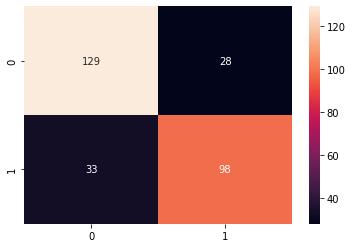

In [7]:
import seaborn as sns

predicted_output = []
real = []

for images, labels in val_ds.take(9):
  predicted = cnn.predict(images)
  for index, label in enumerate(labels):
    real.append(label)
    predicted_output.append(1.0 if predicted[index][0] >= 0.85 else 0.0)
    # print(label)

matrix = tf.math.confusion_matrix(
    real,
    predicted_output,
    2
)
sns.heatmap(matrix, annot=True, fmt="d")
print(matrix)